In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Overview


In [2]:
train_df = pd.read_csv('data/data.csv')

train_df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [3]:
train_df.describe(include='all')

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
count,10000,10000,10000.000000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.00000
unique,10,30,NaN,NaN,4,3,NaN,NaN,NaN,NaN
top,Ford,Accord,NaN,NaN,Electric,Manual,NaN,NaN,NaN,NaN
freq,1048,365,NaN,NaN,2625,3372,NaN,NaN,NaN,NaN
mean,NaN,NaN,2011.543700,3.000560,NaN,NaN,149239.111800,3.497100,2.991100,8852.96440
std,NaN,NaN,6.897699,1.149324,NaN,NaN,86322.348957,1.110097,1.422682,3112.59681
min,NaN,NaN,2000.000000,1.000000,NaN,NaN,25.000000,2.000000,1.000000,2000.00000
25%,NaN,NaN,2006.000000,2.000000,NaN,NaN,74649.250000,3.000000,2.000000,6646.00000
50%,NaN,NaN,2012.000000,3.000000,NaN,NaN,149587.000000,3.000000,3.000000,8858.50000
75%,NaN,NaN,2017.000000,4.000000,NaN,NaN,223577.500000,4.000000,4.000000,11086.50000


In [4]:
# Create a figure and axis for the DataFrame info
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('off')

# Create the text content
text_content = "DataFrame Info:\n"
text_content += "-" * 80 + "\n"
text_content += f"{'#':<3} {'Column':<15} {'Non-Null Count':<20} {'Dtype'}\n"
text_content += "-" * 80 + "\n"

for idx, (col, count, dtype) in enumerate(zip(train_df.columns,
                                            train_df.count().values, 
                                            train_df.dtypes.values)):
    text_content += f"{idx:<3} {col:<15} {count:>5} non-null    {dtype}\n"

text_content += "-" * 80 + "\n"
text_content += f"\nTotal Rows: {len(train_df)}\n"
text_content += f"Total Columns: {len(train_df.columns)}"

# Add text to the figure
plt.text(0.05, 0.95, text_content, fontfamily='monospace', 
         verticalalignment='top', transform=ax.transAxes)

plt.tight_layout()
plt.savefig('dataframe_info.png', bbox_inches='tight', dpi=300)
plt.close()

## Univariate Analysis

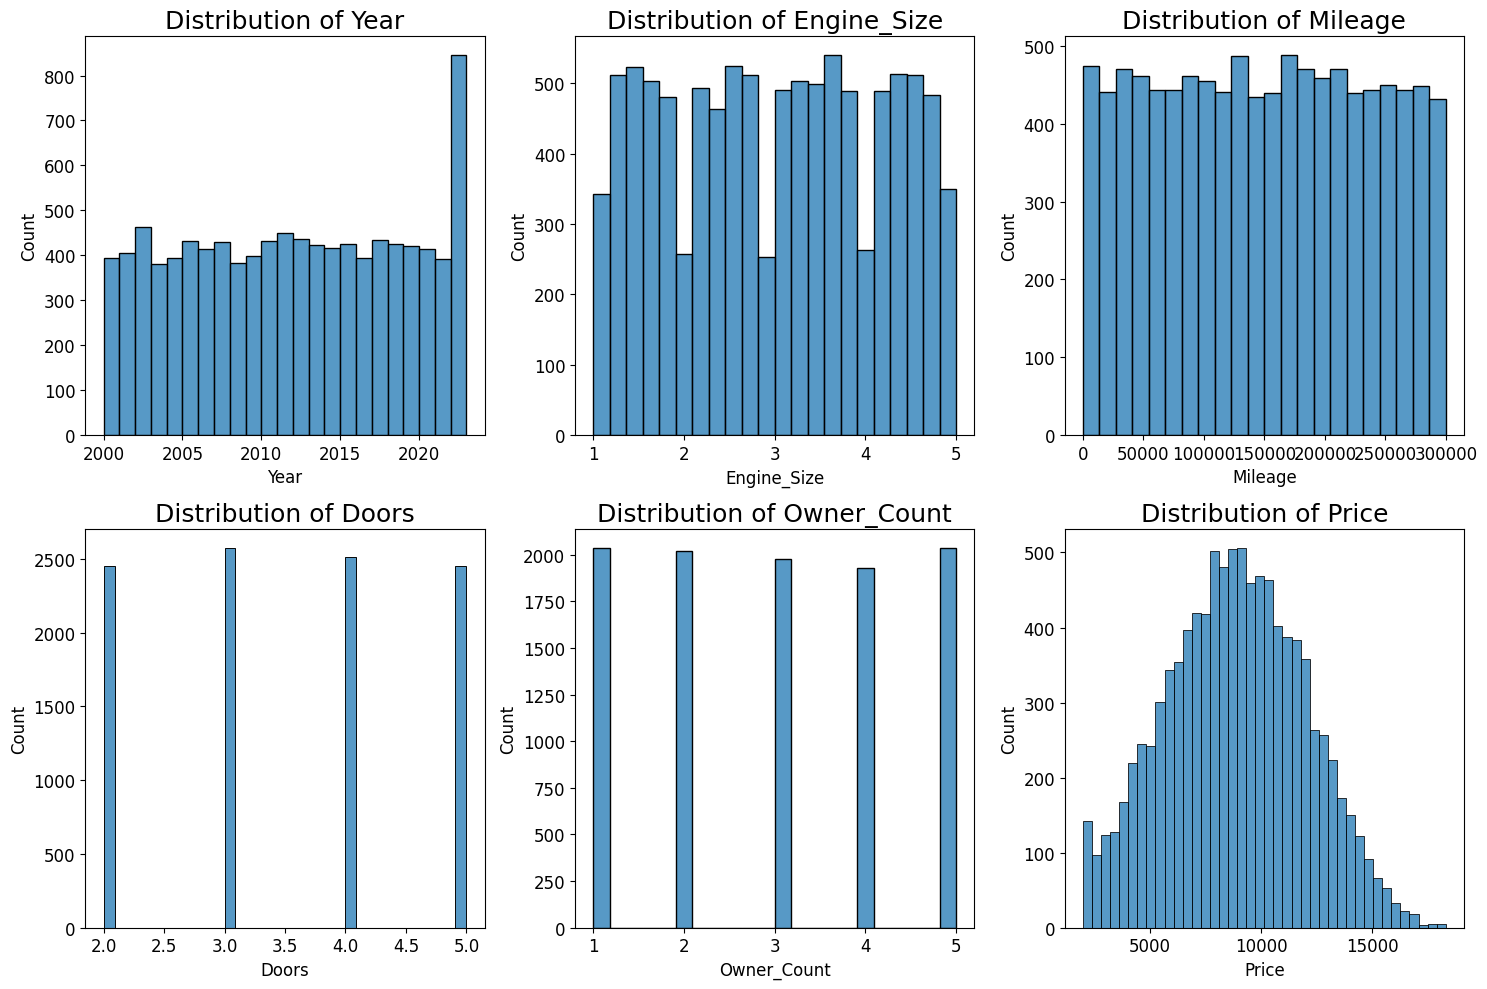

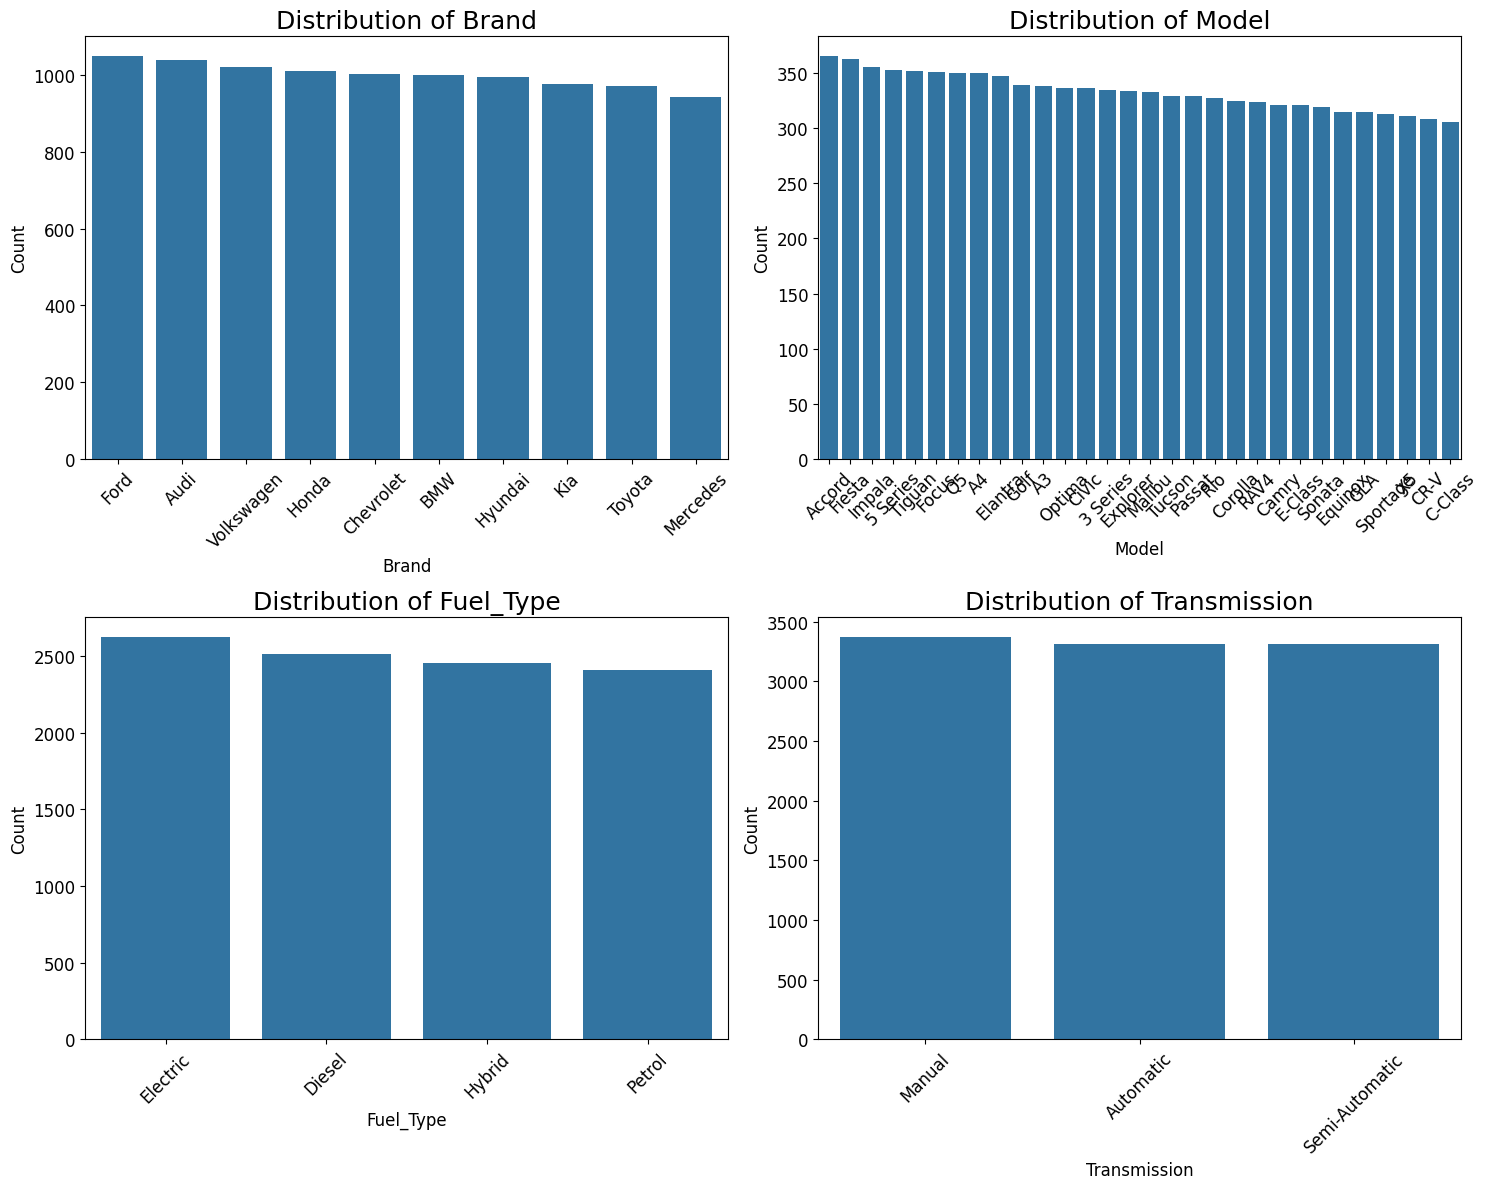

In [5]:
# Create subplots for numerical columns
numerical_cols = ['Year', 'Engine_Size', 'Mileage', 'Doors', 'Owner_Count', 'Price']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, col in enumerate(numerical_cols):
    row = i // 3
    col_idx = i % 3
    sns.histplot(data=train_df, x=col, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Distribution of {col}', fontsize=18)
    axes[row, col_idx].tick_params(axis='both', labelsize=12)
    axes[row, col_idx].set_xlabel(col, fontsize=12)
    axes[row, col_idx].set_ylabel('Count', fontsize=12)
plt.tight_layout()

# Create subplots for categorical columns 
categorical_cols = ['Brand', 'Model', 'Fuel_Type', 'Transmission']
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

for i, col in enumerate(categorical_cols):
    row = i // 2
    col_idx = i % 2
    value_counts = train_df[col].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Distribution of {col}', fontsize=18)
    axes[row, col_idx].tick_params(axis='both', labelsize=12)
    axes[row, col_idx].set_xlabel(col, fontsize=12)
    axes[row, col_idx].set_ylabel('Count', fontsize=12)
    axes[row, col_idx].tick_params(axis='x', rotation=45)
plt.tight_layout()


## Bivariate Analysis

<Figure size 1500x800 with 0 Axes>

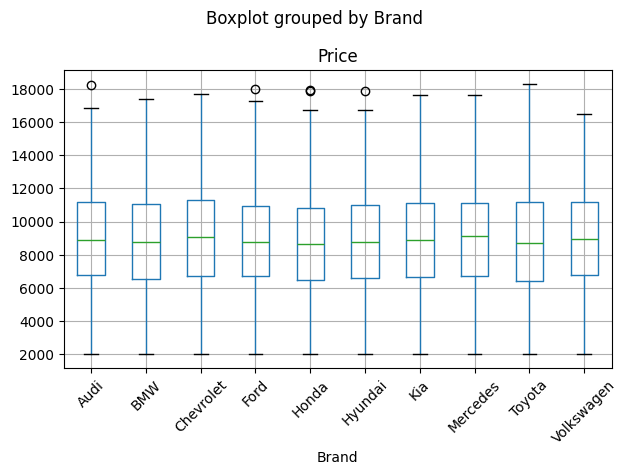

In [6]:
plt.figure(figsize=(15, 8))
train_df.boxplot(column='Price', by='Brand', rot=45)
plt.xticks(fontsize=10)
plt.tight_layout()

<Figure size 1500x800 with 0 Axes>

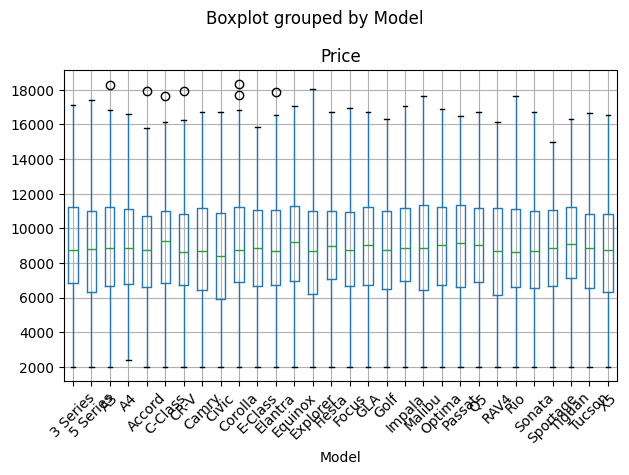

In [7]:
plt.figure(figsize=(15, 8))
train_df.boxplot(column='Price', by='Model', rot=45)
plt.xticks(fontsize=10)
plt.tight_layout()

<Figure size 1500x800 with 0 Axes>

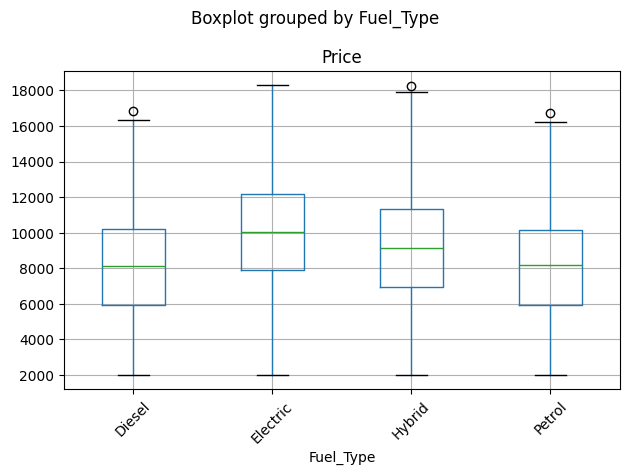

In [8]:
plt.figure(figsize=(15, 8))
train_df.boxplot(column='Price', by='Fuel_Type', rot=45)
plt.xticks(fontsize=10)
plt.tight_layout()

<Figure size 1500x800 with 0 Axes>

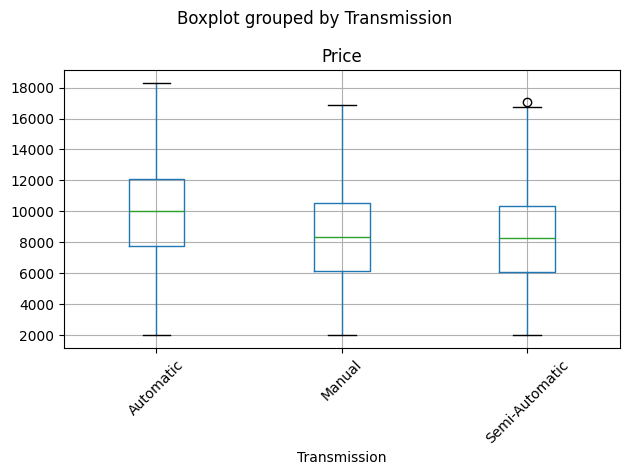

In [9]:
plt.figure(figsize=(15, 8))
train_df.boxplot(column='Price', by='Transmission', rot=45)
plt.xticks(fontsize=10)
plt.tight_layout()

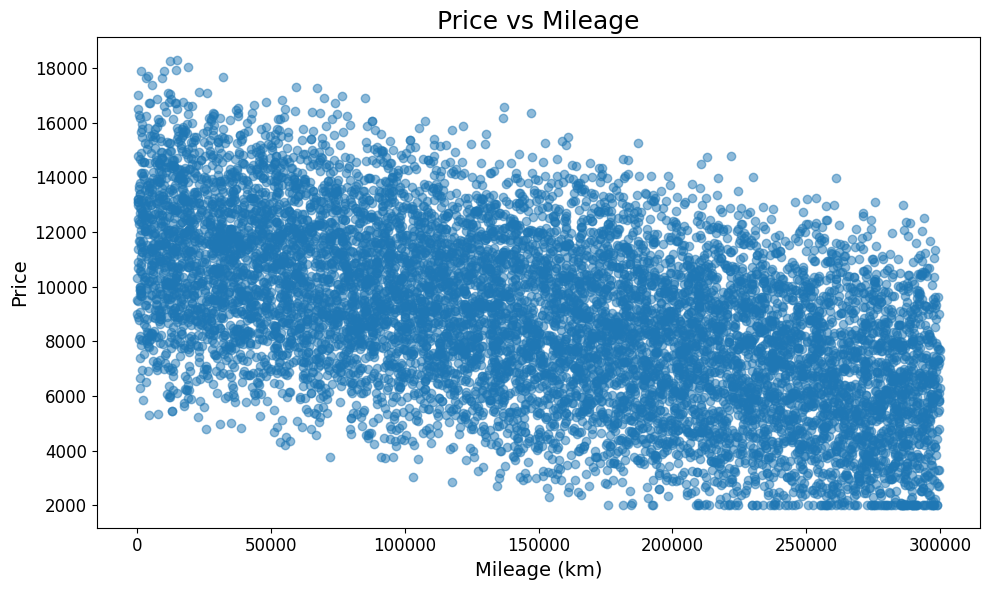

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(train_df['Mileage'], train_df['Price'], alpha=0.5)
plt.xlabel('Mileage (km)', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Price vs Mileage', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

<Figure size 1500x800 with 0 Axes>

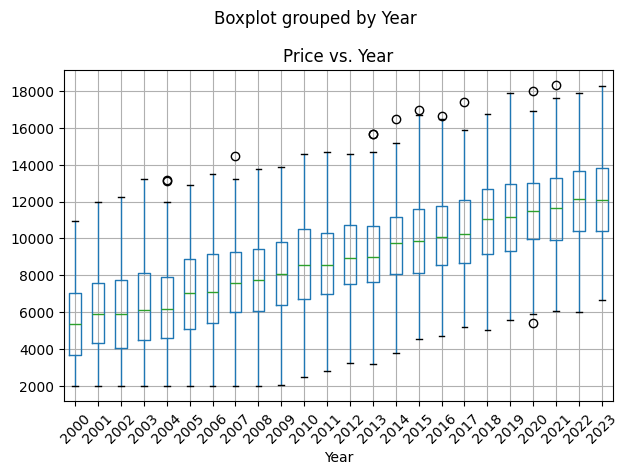

In [11]:
plt.figure(figsize=(15, 8))
train_df.boxplot(column='Price', by='Year', rot=45)
plt.xticks(fontsize=10)
plt.title('Price vs. Year')
plt.tight_layout()

## Correlation Matrix

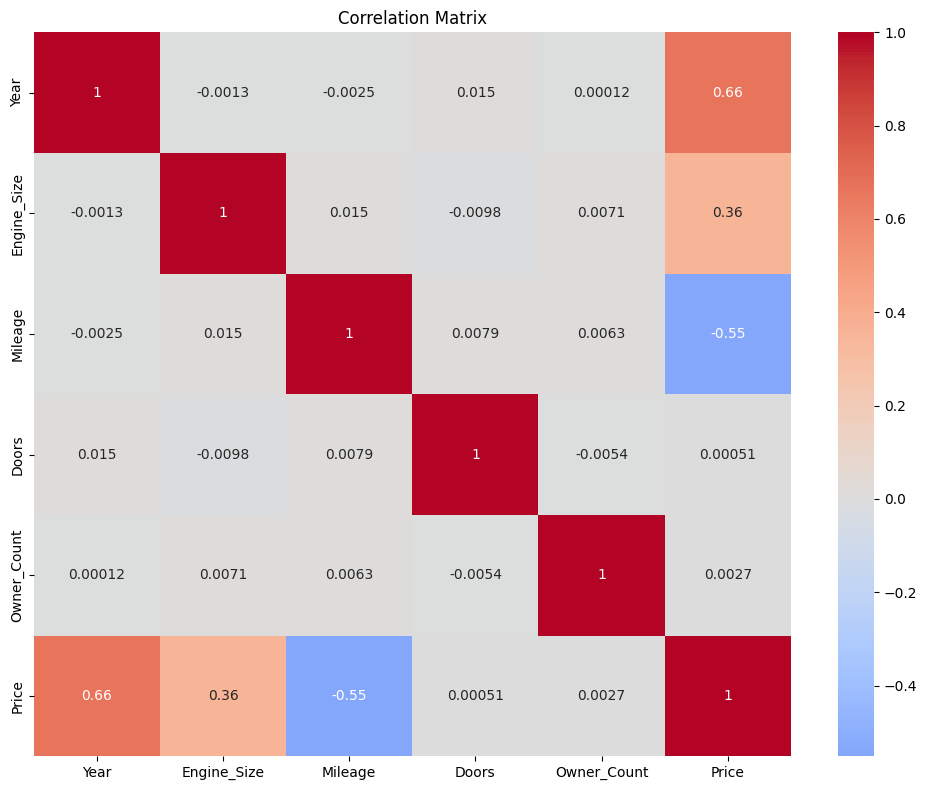

In [12]:
# Select numerical columns for correlation
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns

# Create correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(train_df[numerical_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()


# Replacing missing values

In [13]:
def get_missing_values_df(df):
    missing_col = df.isna().sum()
    missing_pct = (df.isna().sum() / len(df)) * 100
    missing_df = pd.DataFrame({
        'Missing Count': missing_col[missing_col > 0],
        'Missing %': missing_pct[missing_col > 0].round(2)
    })
    return missing_df

missing_col_df = get_missing_values_df(train_df)

missing_col_df

,Missing Count,Missing %


There are no missing values in the dataset.

# Feature Engineering

In [14]:
# Age
train_df['Age'] = 2025 - train_df['Year']
train_df.head()
# Mileage per year
train_df['Mileage_per_year'] = train_df['Mileage'] / train_df['Age']
train_df.head()


,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price,Age,Mileage_per_year
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501,5,57988.800000
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092,13,412.000000
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171,5,46288.000000
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780,2,80485.500000
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867,22,13028.090909


In [15]:
# Remove year column and mileage column
train_df = train_df.drop(columns=['Year', 'Mileage_per_year'])

# One-hot encoding

In [16]:
# One-hot encode categorical variables
categorical_columns = ['Brand', 'Model', 'Fuel_Type', 'Transmission']

# Create dummy variables for each categorical column
encoded_df = pd.get_dummies(train_df, columns=categorical_columns, prefix=categorical_columns)

# Replace original dataframe with encoded version
train_df = encoded_df

train_df.head()

,Engine_Size,Mileage,Doors,Owner_Count,Price,Age,Brand_Audi,Brand_BMW,Brand_Chevrolet,Brand_Ford,...,Model_Tiguan,Model_Tucson,Model_X5,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Transmission_Semi-Automatic
0,4.2,289944,3,5,8501,5,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,2.0,5356,2,3,12092,13,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
2,4.2,231440,4,2,11171,5,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
3,2.0,160971,2,1,11780,2,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
4,2.6,286618,3,3,2867,22,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True


## Correlation Matrix

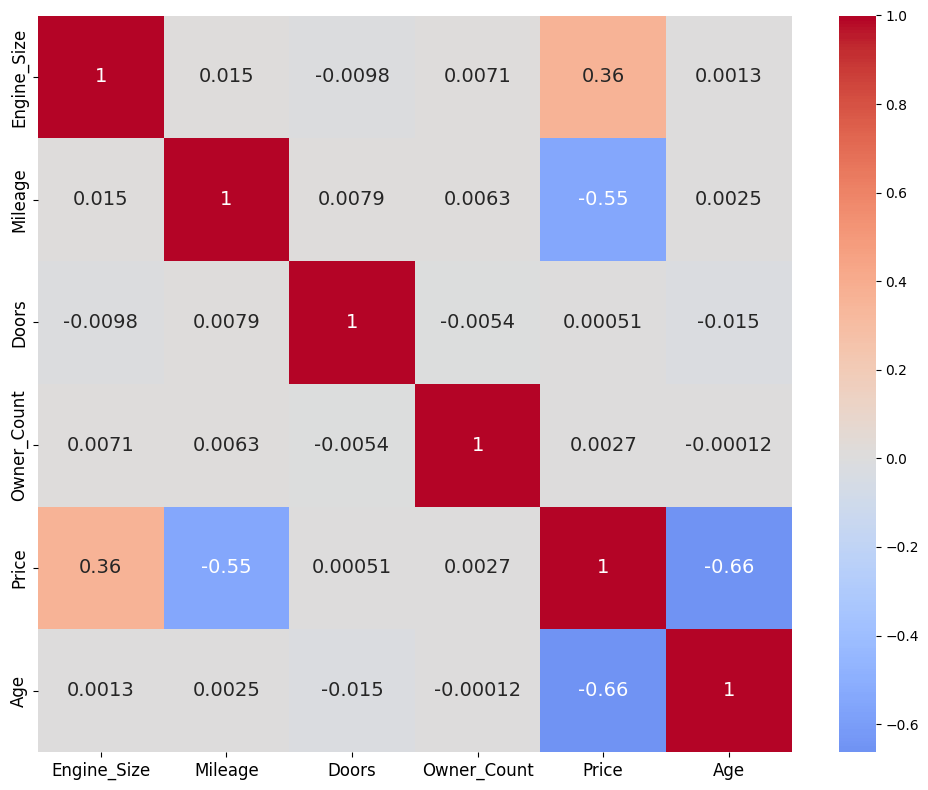

In [17]:
# Select numerical columns for correlation
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns

# Create correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(train_df[numerical_cols].corr(), annot=True, cmap='coolwarm', center=0, annot_kws={'size': 14})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()


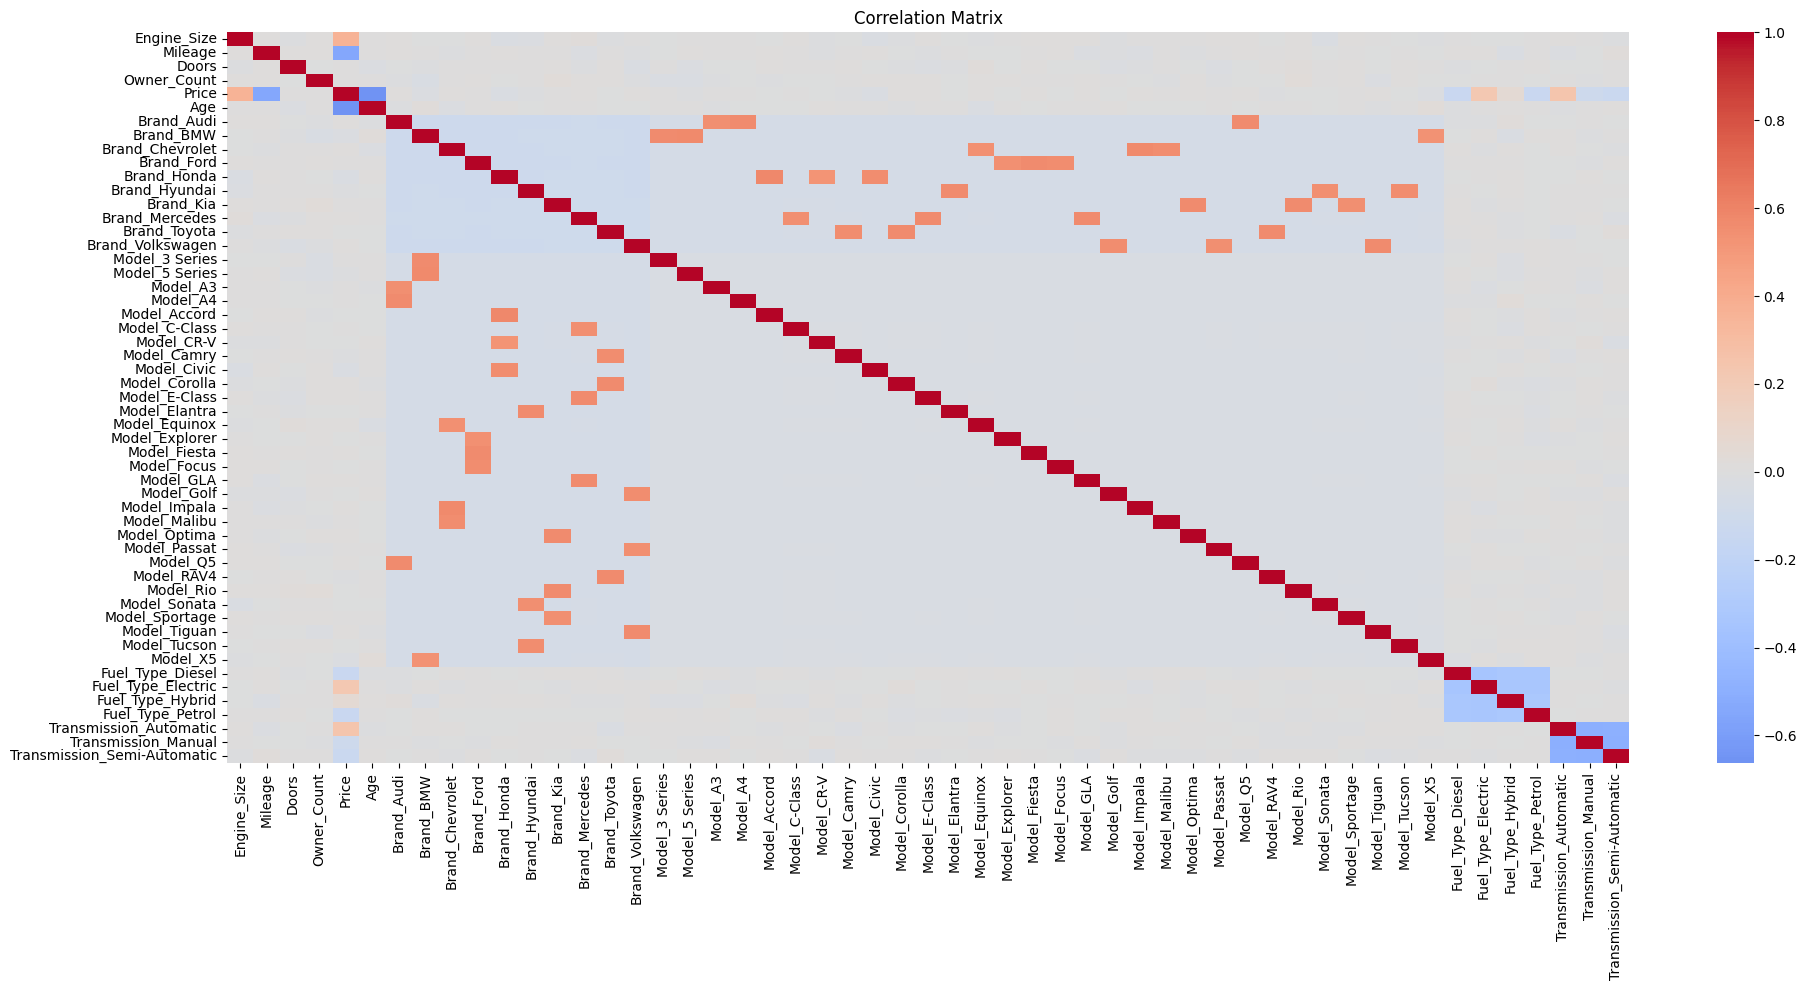

In [18]:
# Select numerical columns for correlation
numerical_cols = train_df.select_dtypes(include=['int64', 'float64', 'bool']).columns

# Create correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(train_df[numerical_cols].corr(), annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()

Top 5 absolute correlations with Price:
Age                            0.663036
Mileage                        0.551227
Engine_Size                    0.357403
Transmission_Automatic         0.245658
Fuel_Type_Electric             0.226043
Fuel_Type_Petrol               0.141650
Fuel_Type_Diesel               0.136894
Transmission_Semi-Automatic    0.133073
Transmission_Manual            0.112186
Name: Price, dtype: float64


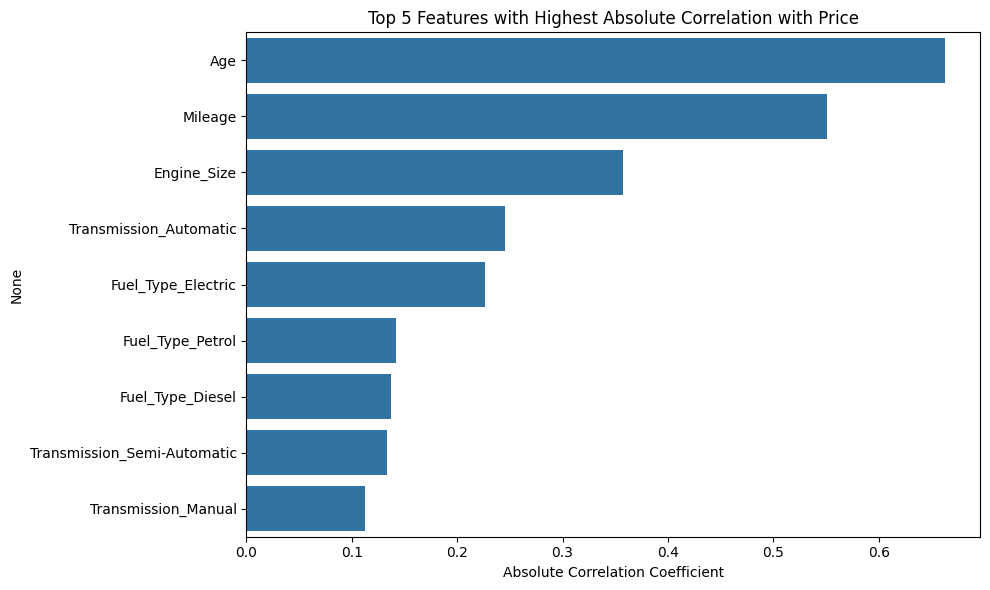

In [29]:
4444

# Normalize the data

In [19]:
# Select numerical columns 
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns

# Create a MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical columns
train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])

# Display first few rows to verify normalization
train_df.head()


,Engine_Size,Mileage,Doors,Owner_Count,Price,Age,Brand_Audi,Brand_BMW,Brand_Chevrolet,Brand_Ford,...,Model_Tiguan,Model_Tucson,Model_X5,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Transmission_Semi-Automatic
0,0.80,0.966648,0.333333,1.00,0.398810,0.130435,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,0.25,0.017775,0.000000,0.50,0.619103,0.478261,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
2,0.80,0.771584,0.666667,0.25,0.562604,0.130435,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
3,0.25,0.536626,0.000000,0.00,0.599963,0.000000,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
4,0.40,0.955558,0.333333,0.50,0.053187,0.869565,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True


# Save the transformed data

In [20]:
train_df.to_csv('data/transformed_data.csv', index=False)

# Print confirmation message
print("Transformed data saved to 'transformed_data.csv'")


Transformed data saved to 'transformed_data.csv'


# 